In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import load_dataset
import torch
import evaluate

# Dataset

In [ ]:
# Load dataset
dataset = load_dataset("glue", "sst2")

# Convert to text-to-text format
def preprocess(example):
    label_text = "positive" if example["label"] == 1 else "negative"
    return {
        "input_text": "sst2 sentence: " + example["sentence"],
        "target_text": label_text
    }

dataset = dataset.map(preprocess)

# Load tokenizer
model_name = "google/switch-base-8"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(example):
    model_inputs = tokenizer(example["input_text"], truncation=True, padding="max_length", max_length=128)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(example["target_text"], truncation=True, padding="max_length", max_length=4)
    model_inputs["label"] = labels["input_ids"]
    return model_inputs


tokenized_dataset = dataset.map(tokenize, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3959: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

# Model

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

# Set paths
model_path = "/content/drive/MyDrive/sst2-switch-model"
tokenizer_path = "/content/drive/MyDrive/sst2-switch-tokenizer"

# Load
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

SwitchTransformersForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): SwitchTransformersStack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): SwitchTransformersBlock(
        (layer): ModuleList(
          (0): SwitchTransformersLayerSelfAttention(
            (SelfAttention): SwitchTransformersAttention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): SwitchTransformersLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): SwitchTransformersLayerFF(
            (mlp): SwitchTransformersDenseActDense(
              (wi): Linear(in_features=768, out_features=3072

In [ ]:
def predict_sentiment(sentence):
    input_text = "sst2 sentence: " + sentence
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

    # Generate prediction (max_new_tokens = 4 is enough for "positive"/"negative")
    output = model.generate(**inputs, max_new_tokens=4)
    decoded = tokenizer.decode(output[0], skip_special_tokens=True)
    return decoded.strip().lower()


In [ ]:
print(predict_sentiment("This movie was fantastic!"))
# Output: "positive"

print(predict_sentiment("I didn't enjoy the film."))
# Output: "negative"


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

# Layer Analytics

In [ ]:
import torch
from collections import defaultdict

# Assume 8 experts
NUM_EXPERTS = 8
expert_counts = defaultdict(lambda: torch.zeros(NUM_EXPERTS).to(device))

def patch_moe_layer(layer, layer_idx):
    original_forward = layer.forward

    def custom_forward(hidden_states):
        # Get routing logits
        router_logits = layer.router(hidden_states)
        router_logits = router_logits[0]
        # if isinstance(router_logits, tuple):
        #   router_logits = router_logits[0]  # Get the actual logits

        # print(router_logits)
        expert_idx = torch.argmax(router_logits, dim=-1)

        # Count activations
        for i in range(NUM_EXPERTS):
            expert_counts[layer_idx][i] += (expert_idx == i).sum()

        return original_forward(hidden_states)

    layer.forward = custom_forward

# Locate and patch MoE layers in encoder
for i, block in enumerate(model.encoder.block):
    # try:
    if hasattr(block.layer[1], "mlp"):
        layer = block.layer[1].mlp

        if hasattr(block.layer[1].mlp, "experts"):

          # experts = block.layer[1]  # This is where MoE typically resides
          patch_moe_layer(layer, i)
          print(f"✅ Patched MoE layer at encoder block {i}")
    # except AttributeError:
        # print(f"❌ No MoE in encoder block {i}")


✅ Patched MoE layer at encoder block 1
✅ Patched MoE layer at encoder block 3
✅ Patched MoE layer at encoder block 5
✅ Patched MoE layer at encoder block 7
✅ Patched MoE layer at encoder block 9
✅ Patched MoE layer at encoder block 11


In [ ]:
import torch
from collections import defaultdict

# Assume 8 experts
NUM_EXPERTS = 8
decoder_expert_counts = defaultdict(lambda: torch.zeros(NUM_EXPERTS).to(device))

def patch_moe_layer(layer, layer_idx):
    original_forward = layer.forward

    def custom_forward(hidden_states):
        # Get routing logits
        router_logits = layer.router(hidden_states)
        router_logits = router_logits[0]
        # if isinstance(router_logits, tuple):
        #   router_logits = router_logits[0]  # Get the actual logits

        # print(router_logits)
        expert_idx = torch.argmax(router_logits, dim=-1)

        # Count activations
        for i in range(NUM_EXPERTS):
            decoder_expert_counts[layer_idx][i] += (expert_idx == i).sum()

        return original_forward(hidden_states)

    layer.forward = custom_forward

# Locate and patch MoE layers in encoder
for i, block in enumerate(model.decoder.block):
    # try:
    # print(block)
    if hasattr(block.layer[2], "mlp"):
        layer = block.layer[2].mlp

        if hasattr(block.layer[2].mlp, "experts"):

          # experts = block.layer[1]  # This is where MoE typically resides
          patch_moe_layer(layer, i)
          print(f"✅ Patched MoE layer at decoder block {i}")
    # except AttributeError:
        # print(f"❌ No MoE in encoder block {i}")


✅ Patched MoE layer at decoder block 1
✅ Patched MoE layer at decoder block 3
✅ Patched MoE layer at decoder block 5
✅ Patched MoE layer at decoder block 7
✅ Patched MoE layer at decoder block 9
✅ Patched MoE layer at decoder block 11


In [ ]:
# for i, block in enumerate(model.base_model.encoder.block):
#     if hasattr(block, "layer") and hasattr(block.layer[1], "mlp"):
#         block.layer[1].mlp.register_forward_hook(log_expert_counts(i))


# Evaluate

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

def evaluate_model(model, val_dataset):


  metric = evaluate.load("accuracy")

  def compute_metrics(eval_pred):
      pred_ids = eval_pred.predictions
      label_ids = eval_pred.label_ids
      decoded_preds = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
      decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

      label_map = {"positive": 1, "negative": 0}
      mapped_preds = [label_map.get(p.strip().lower(), -1) for p in decoded_preds]
      mapped_labels = [label_map.get(l.strip().lower(), -1) for l in decoded_labels]

      # Remove invalid pairs
      pairs = [(p, l) for p, l in zip(mapped_preds, mapped_labels) if p != -1 and l != -1]
      if not pairs:
          return {"accuracy": 0.0}

      correct = sum(int(p == l) for p, l in pairs)
      return {"accuracy": correct / len(pairs)}

  training_args = Seq2SeqTrainingArguments(
      output_dir="./results",
      per_device_eval_batch_size=8,
      do_train=False,
      do_eval=True,
      predict_with_generate=True,  # This is needed to use `generate()` during predict
      generation_max_length=4,     # Enough for "positive"/"negative"
  )

  data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

  trainer = Seq2SeqTrainer(
      model=model,
      args=training_args,
      tokenizer=tokenizer,
      data_collator=data_collator,
      eval_dataset=val_dataset,
      compute_metrics=compute_metrics
  )

  return trainer.predict(val_dataset).metrics['test_accuracy']


In [ ]:
import copy
temp = copy.deepcopy(model.base_model.encoder.block[1])
model.base_model.encoder.block[1] = copy.deepcopy(model.base_model.encoder.block[3])
model.base_model.encoder.block[3] = temp


In [ ]:
evaluate_model(model, tokenized_dataset["validation"])

<ipython-input-7-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


0.9288990825688074

In [ ]:
expert_counts

defaultdict(<function __main__.<lambda>()>,
            {1: tensor([ 60144.,  11476., 109162.,   5904.,   6542.,  13764.,  13036.,   3204.],
                    device='cuda:0'),
             3: tensor([ 66424., 111558.,   6726.,   6686.,   6634.,   5634.,  10542.,   9028.],
                    device='cuda:0'),
             5: tensor([6.4572e+04, 1.0562e+04, 4.1180e+03, 4.0000e+00, 8.5560e+03, 1.5662e+04,
                     8.1480e+03, 1.1161e+05], device='cuda:0'),
             7: tensor([ 64994.,  16326.,   2342., 111082.,   1066.,  16082.,   6214.,   5126.],
                    device='cuda:0'),
             9: tensor([9.4270e+04, 1.3000e+02, 1.1125e+05, 1.0800e+02, 2.1600e+02, 1.6926e+04,
                     2.7000e+02, 5.8000e+01], device='cuda:0'),
             11: tensor([1.3401e+05, 6.0000e+00, 1.6460e+03, 6.2220e+03, 2.7734e+04, 0.0000e+00,
                     5.2138e+04, 1.4780e+03], device='cuda:0')})

In [ ]:
# Assuming expert_counts is of form: {layer_idx: torch.tensor([count_e0, ..., count_e7])}
most_used_experts = {}

for layer, counts in expert_counts.items():
    most_used_expert = torch.argmax(counts).item()
    most_used_experts[layer] = most_used_expert

# Print nicely
for layer in sorted(most_used_experts.keys()):
    print(f"{layer}: expert_{most_used_experts[layer]}")


1: expert_2
3: expert_1
5: expert_7
7: expert_3
9: expert_2
11: expert_0


In [ ]:
# Assuming expert_counts is of form: {layer_idx: torch.tensor([count_e0, ..., count_e7])}
decoder_most_used_experts = {}

for layer, counts in decoder_expert_counts.items():
    most_used_expert = torch.argmax(counts).item()
    decoder_most_used_experts[layer] = most_used_expert

# Print nicely
for layer in sorted(decoder_most_used_experts.keys()):
    print(f"{layer}: expert_{decoder_most_used_experts[layer]}")

1: expert_6
3: expert_7
5: expert_1
7: expert_3
9: expert_1
11: expert_4


# Base Model Test Accuracy: 'test_accuracy': 0.9288990825688074

# Expert Swapping

In [ ]:
def get_expert(model, layer_idx, expert_idx):
    return model.base_model.encoder.block[layer_idx].layer[1].mlp.experts[f"expert_{expert_idx}"]

# def swap_experts(model, l1, e1, l2, e2):
#     expert1 = get_expert(model, l1, e1)
#     expert2 = get_expert(model, l2, e2)
#     for p1, p2 in zip(expert1.parameters(), expert2.parameters()):
#         tmp = p1.data.clone()
#         p1.data.copy_(p2.data)
#         p2.data.copy_(tmp)


# def swap_experts(model, l1, e1, l2, e2):
#     """
#     Swaps expert modules between expert e1 at layer l1 and expert e2 at layer l2.
#     """
#     experts1 = model.base_model.encoder.block[l1].layer[1].mlp.experts
#     experts2 = model.base_model.encoder.block[l2].layer[1].mlp.experts

#     e1 = f"expert_{e1}"
#     e2 = f"expert_{e2}"
#     # Swap modules
#     temp = experts1[e1]
#     experts1[e1] = experts2[e2]
#     experts2[e2] = temp

def swap_experts(model, l1, e1, l2, e2):
    """
    Correctly swaps expert modules by re-registering them with add_module.
    """
    mlp1 = model.base_model.encoder.block[l1].layer[1].mlp
    mlp2 = model.base_model.encoder.block[l2].layer[1].mlp

    expert1_name = f"expert_{e1}"
    expert2_name = f"expert_{e2}"

    expert1 = mlp1.experts[expert1_name]
    expert2 = mlp2.experts[expert2_name]

    # Swap: re-register modules explicitly
    mlp1.experts._modules[expert1_name] = expert2
    mlp2.experts._modules[expert2_name] = expert1


def swap_decoder_experts(model, l1, e1, l2, e2):
    """
    Correctly swaps expert modules by re-registering them with add_module.
    """
    mlp1 = model.base_model.decoder.block[l1].layer[2].mlp
    mlp2 = model.base_model.decoder.block[l2].layer[2].mlp

    expert1_name = f"expert_{e1}"
    expert2_name = f"expert_{e2}"

    expert1 = mlp1.experts[expert1_name]
    expert2 = mlp2.experts[expert2_name]

    # Swap: re-register modules explicitly
    mlp1.experts._modules[expert1_name] = expert2
    mlp2.experts._modules[expert2_name] = expert1


In [ ]:
w_before = model.base_model.decoder.block[1].layer[2].mlp.experts["expert_6"].wi.weight.clone()
swap_decoder_experts(model, 1, 6, 5, 3)
w_after = model.base_model.decoder.block[1].layer[2].mlp.experts["expert_6"].wi.weight.clone()
print((w_before - w_after).abs().sum())

tensor(339713., device='cuda:0', grad_fn=<SumBackward0>)


In [ ]:
import torch
import copy
import numpy as np
from tqdm import tqdm

# Provided dictionary
most_used_experts = {
    1: 2,
    3: 1,
    5: 7,
    7: 3,
    9: 2,
    11: 0
}

# decoder_most_used_experts = {
#     1: 6,
#     3: 7,
#     5: 1,
#     7: 3,
#     9: 1,
#     11: 4
# }

selected_layers = list(decoder_most_used_experts.keys())
n = len(selected_layers)

acc_matrix = np.zeros((n, n))
original_model = copy.deepcopy(model)

for i_idx, i in enumerate(selected_layers):
    for j_idx, j in enumerate(selected_layers):
        # Restore the original model for each swap
        model = copy.deepcopy(original_model)

        ei = decoder_most_used_experts[i]
        ej = decoder_most_used_experts[j]

        if i != j:
            swap_decoder_experts(model, i, ei, j, ej)
            acc = evaluate_model(model, tokenized_dataset["validation"])
            acc_matrix[i_idx, j_idx] = acc
            print(f"Swapped Layer {i}↔{j} | Expert {ei}↔{ej} → Accuracy: {acc}")


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 1↔3 | Expert 6↔7 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 1↔5 | Expert 6↔1 → Accuracy: 0.930045871559633


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 1↔7 | Expert 6↔3 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 1↔9 | Expert 6↔1 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 1↔11 | Expert 6↔4 → Accuracy: 0.9277522935779816


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 3↔1 | Expert 7↔6 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 3↔5 | Expert 7↔1 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 3↔7 | Expert 7↔3 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 3↔9 | Expert 7↔1 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 3↔11 | Expert 7↔4 → Accuracy: 0.926605504587156


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 5↔1 | Expert 1↔6 → Accuracy: 0.930045871559633


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 5↔3 | Expert 1↔7 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 5↔7 | Expert 1↔3 → Accuracy: 0.930045871559633


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 5↔9 | Expert 1↔1 → Accuracy: 0.9277522935779816


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 5↔11 | Expert 1↔4 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 7↔1 | Expert 3↔6 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 7↔3 | Expert 3↔7 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 7↔5 | Expert 3↔1 → Accuracy: 0.930045871559633


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 7↔9 | Expert 3↔1 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 7↔11 | Expert 3↔4 → Accuracy: 0.930045871559633


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 9↔1 | Expert 1↔6 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 9↔3 | Expert 1↔7 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 9↔5 | Expert 1↔1 → Accuracy: 0.9277522935779816


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 9↔7 | Expert 1↔3 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 9↔11 | Expert 1↔4 → Accuracy: 0.9277522935779816


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 11↔1 | Expert 4↔6 → Accuracy: 0.9277522935779816


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 11↔3 | Expert 4↔7 → Accuracy: 0.926605504587156


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 11↔5 | Expert 4↔1 → Accuracy: 0.9288990825688074


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 11↔7 | Expert 4↔3 → Accuracy: 0.930045871559633


<ipython-input-15-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped Layer 11↔9 | Expert 4↔1 → Accuracy: 0.9277522935779816


In [ ]:
# np.save('/content/drive/MyDrive/accuracy_matrix', acc_matrix)

In [ ]:
# np.save('/content/drive/MyDrive/decoder_accuracy_matrix', acc_matrix)

In [ ]:
import torch
import copy
import numpy as np
from tqdm import tqdm

# Layers with MoE experts in encoder
moe_layers = [9, 11]
num_experts = len(model.base_model.encoder.block[moe_layers[0]].layer[1].mlp.experts)

# Build (layer, expert_id) pairs only from valid MoE layers
expert_pairs = [(layer, expert_id) for layer in moe_layers for expert_id in range(num_experts)]

n = len(expert_pairs)
acc_matrix = np.zeros((n, n))
original_model = copy.deepcopy(model)

# Exhaustive expert swapping
for i in tqdm(range(n)):
    for j in range(n):
        model = copy.deepcopy(original_model)
        l1, e1 = expert_pairs[i]
        l2, e2 = expert_pairs[j]

        if l1 != l2:
            print(l1, l2)
            swap_experts(model, l1, e1, l2, e2)

            acc = evaluate_model(model, tokenized_dataset["validation"])
            acc_matrix[i, j] = acc
            print(f"Swapped (L{l1}, E{e1}) ↔ (L{l2}, E{e2}) → Accuracy: {acc:.4f}")


  0%|          | 0/16 [00:00<?, ?it/s]

1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: saivamsi-ds123 (saivamsi-ds123-university-of-california-santa-barbara) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Swapped (L1, E0) ↔ (L3, E0) → Accuracy: 0.9289
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E0) ↔ (L3, E1) → Accuracy: 0.9278
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E0) ↔ (L3, E2) → Accuracy: 0.9243
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E0) ↔ (L3, E3) → Accuracy: 0.9278
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E0) ↔ (L3, E4) → Accuracy: 0.9255
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E0) ↔ (L3, E5) → Accuracy: 0.9289
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E0) ↔ (L3, E6) → Accuracy: 0.9220
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


  6%|▋         | 1/16 [02:39<39:59, 160.00s/it]

Swapped (L1, E0) ↔ (L3, E7) → Accuracy: 0.9278
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E1) ↔ (L3, E0) → Accuracy: 0.9197
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E1) ↔ (L3, E1) → Accuracy: 0.9163
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E1) ↔ (L3, E2) → Accuracy: 0.9140
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E1) ↔ (L3, E3) → Accuracy: 0.9117
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E1) ↔ (L3, E4) → Accuracy: 0.9106
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E1) ↔ (L3, E5) → Accuracy: 0.9174
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E1) ↔ (L3, E6) → Accuracy: 0.9243
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 12%|█▎        | 2/16 [04:58<34:19, 147.10s/it]

Swapped (L1, E1) ↔ (L3, E7) → Accuracy: 0.9128
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E2) ↔ (L3, E0) → Accuracy: 0.9060
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E2) ↔ (L3, E1) → Accuracy: 0.9151
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E2) ↔ (L3, E2) → Accuracy: 0.9151
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E2) ↔ (L3, E3) → Accuracy: 0.9209
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E2) ↔ (L3, E4) → Accuracy: 0.9037
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E2) ↔ (L3, E5) → Accuracy: 0.9186
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E2) ↔ (L3, E6) → Accuracy: 0.9232
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 19%|█▉        | 3/16 [07:17<31:07, 143.68s/it]

Swapped (L1, E2) ↔ (L3, E7) → Accuracy: 0.9186
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E3) ↔ (L3, E0) → Accuracy: 0.9243
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E3) ↔ (L3, E1) → Accuracy: 0.9243
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E3) ↔ (L3, E2) → Accuracy: 0.9128
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E3) ↔ (L3, E3) → Accuracy: 0.9266
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E3) ↔ (L3, E4) → Accuracy: 0.9220
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E3) ↔ (L3, E5) → Accuracy: 0.9255
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E3) ↔ (L3, E6) → Accuracy: 0.9289
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 25%|██▌       | 4/16 [09:37<28:25, 142.12s/it]

Swapped (L1, E3) ↔ (L3, E7) → Accuracy: 0.9266
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E4) ↔ (L3, E0) → Accuracy: 0.9174
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E4) ↔ (L3, E1) → Accuracy: 0.9151
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E4) ↔ (L3, E2) → Accuracy: 0.9232
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E4) ↔ (L3, E3) → Accuracy: 0.9312
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E4) ↔ (L3, E4) → Accuracy: 0.9151
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E4) ↔ (L3, E5) → Accuracy: 0.9174
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E4) ↔ (L3, E6) → Accuracy: 0.9266
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 31%|███▏      | 5/16 [11:56<25:52, 141.16s/it]

Swapped (L1, E4) ↔ (L3, E7) → Accuracy: 0.9243
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E5) ↔ (L3, E0) → Accuracy: 0.9174
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E5) ↔ (L3, E1) → Accuracy: 0.8956
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E5) ↔ (L3, E2) → Accuracy: 0.9106
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E5) ↔ (L3, E3) → Accuracy: 0.9060
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E5) ↔ (L3, E4) → Accuracy: 0.9048
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E5) ↔ (L3, E5) → Accuracy: 0.8979
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E5) ↔ (L3, E6) → Accuracy: 0.9048
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 38%|███▊      | 6/16 [14:15<23:23, 140.34s/it]

Swapped (L1, E5) ↔ (L3, E7) → Accuracy: 0.8968
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E6) ↔ (L3, E0) → Accuracy: 0.9163
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E6) ↔ (L3, E1) → Accuracy: 0.9060
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E6) ↔ (L3, E2) → Accuracy: 0.9117
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E6) ↔ (L3, E3) → Accuracy: 0.9106
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E6) ↔ (L3, E4) → Accuracy: 0.9151
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E6) ↔ (L3, E5) → Accuracy: 0.9174
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E6) ↔ (L3, E6) → Accuracy: 0.9128
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 44%|████▍     | 7/16 [16:35<21:00, 140.07s/it]

Swapped (L1, E6) ↔ (L3, E7) → Accuracy: 0.9083
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E7) ↔ (L3, E0) → Accuracy: 0.9289
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E7) ↔ (L3, E1) → Accuracy: 0.9255
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E7) ↔ (L3, E2) → Accuracy: 0.9220
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E7) ↔ (L3, E3) → Accuracy: 0.9243
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E7) ↔ (L3, E4) → Accuracy: 0.9163
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E7) ↔ (L3, E5) → Accuracy: 0.9220
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L1, E7) ↔ (L3, E6) → Accuracy: 0.9243
1 3


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 50%|█████     | 8/16 [18:54<18:39, 139.90s/it]

Swapped (L1, E7) ↔ (L3, E7) → Accuracy: 0.9232
3 1


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Swapped (L3, E0) ↔ (L1, E0) → Accuracy: 0.9289
3 1


<ipython-input-9-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


 50%|█████     | 8/16 [19:21<19:21, 145.24s/it]


KeyboardInterrupt: 

In [ ]:
tokenized_dataset["validation"]

872

In [ ]:
expert_pairs

[(1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (11, 0),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7)]

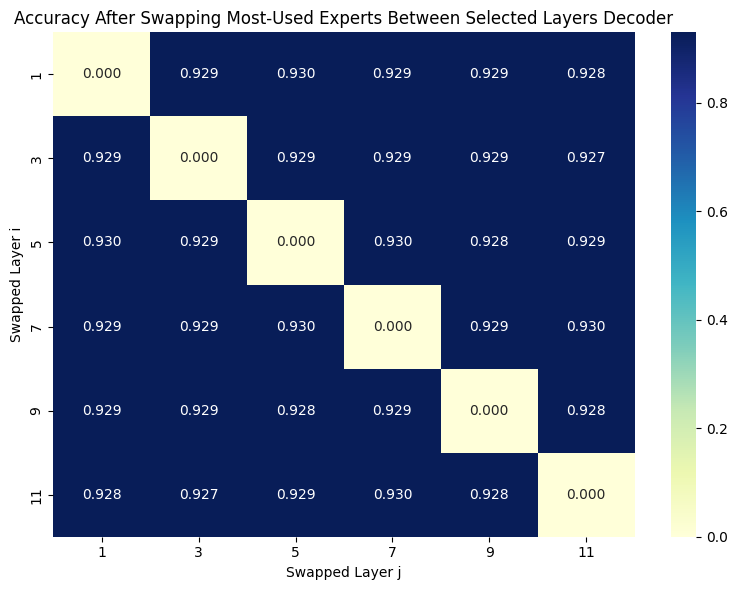

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(acc_matrix, annot=True, fmt=".3f", cmap="YlGnBu",
            xticklabels=selected_layers, yticklabels=selected_layers)
plt.xlabel("Swapped Layer j")
plt.ylabel("Swapped Layer i")
plt.title("Accuracy After Swapping Most-Used Experts Between Selected Layers Decoder")
plt.tight_layout()
plt.show()


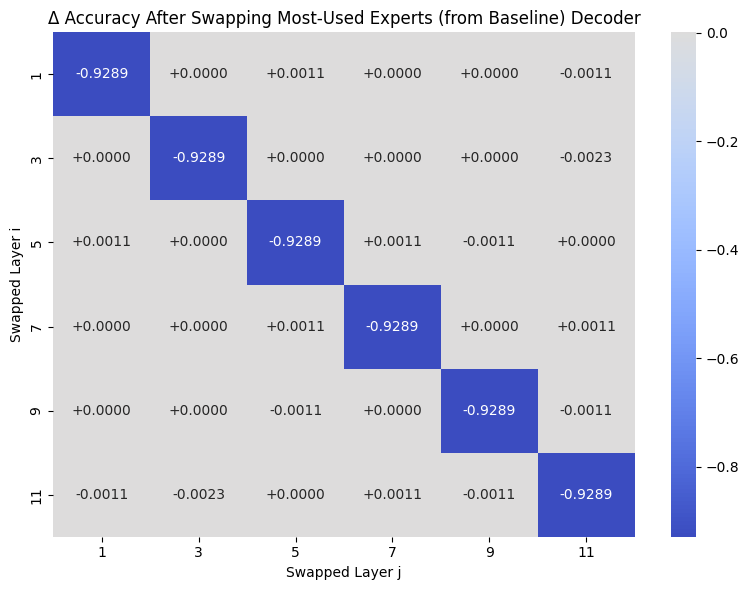

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace this with your actual base accuracy if needed
base_accuracy = 0.9288990825688074

# Compute delta matrix (positive = accuracy improved, negative = drop)
delta_matrix = acc_matrix - base_accuracy

plt.figure(figsize=(8, 6))
sns.heatmap(delta_matrix, annot=True, fmt="+.4f", center=0.0, cmap="coolwarm",
            xticklabels=selected_layers, yticklabels=selected_layers)

plt.xlabel("Swapped Layer j")
plt.ylabel("Swapped Layer i")
plt.title("Δ Accuracy After Swapping Most-Used Experts (from Baseline) Decoder")
plt.tight_layout()
plt.show()


In [ ]:
# Print a checksum or sample weights
e1_before = model.base_model.encoder.block[1].layer[1].mlp.experts["expert_1"].wi.weight.clone()
e2_before = model.base_model.encoder.block[5].layer[1].mlp.experts["expert_2"].wi.weight.clone()

swap_experts(model, i, ei, j, ej)

e1_after = model.base_model.encoder.block[1].layer[1].mlp.experts["expert_1"].wi.weight
e2_after = model.base_model.encoder.block[5].layer[1].mlp.experts["expert_2"].wi.weight

print("Layer", i, "Expert", ei, "checksum diff:", (e1_before - e1_after).abs().sum())
print("Layer", j, "Expert", ej, "checksum diff:", (e2_before - e2_after).abs().sum())


Layer 1 Expert 2 checksum diff: tensor(0., device='cuda:0', grad_fn=<SumBackward0>)
Layer 7 Expert 3 checksum diff: tensor(0., device='cuda:0', grad_fn=<SumBackward0>)


# Misclassified

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

def predict_model(model, val_dataset):


  metric = evaluate.load("accuracy")

  def compute_metrics(eval_pred):
      pred_ids = eval_pred.predictions
      label_ids = eval_pred.label_ids
      decoded_preds = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
      decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

      label_map = {"positive": 1, "negative": 0}
      mapped_preds = [label_map.get(p.strip().lower(), -1) for p in decoded_preds]
      mapped_labels = [label_map.get(l.strip().lower(), -1) for l in decoded_labels]

      # Remove invalid pairs
      pairs = [(p, l) for p, l in zip(mapped_preds, mapped_labels) if p != -1 and l != -1]
      if not pairs:
          return {"accuracy": 0.0}

      correct = sum(int(p == l) for p, l in pairs)
      return {"accuracy": correct / len(pairs)}

  training_args = Seq2SeqTrainingArguments(
      output_dir="./results",
      per_device_eval_batch_size=8,
      do_train=False,
      do_eval=True,
      predict_with_generate=True,  # This is needed to use `generate()` during predict
      generation_max_length=4,     # Enough for "positive"/"negative"
  )

  data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

  trainer = Seq2SeqTrainer(
      model=model,
      args=training_args,
      tokenizer=tokenizer,
      data_collator=data_collator,
      eval_dataset=val_dataset,
      compute_metrics=compute_metrics
  )

  logits = trainer.predict(val_dataset)
  pred_ids = logits.predictions
  label_ids = logits.label_ids
  label_map = {"positive": 1, "negative": 0}
  decoded_preds = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
  decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
  mapped_preds = [label_map.get(p.strip().lower(), -1) for p in decoded_preds]
  mapped_labels = [label_map.get(l.strip().lower(), -1) for l in val_dataset['target_text']]
  pairs = [(p, l) for p, l in zip(mapped_preds, mapped_labels) if p != -1 and l != -1]
  return mapped_preds, mapped_labels


In [ ]:
from transformers import Seq2SeqTrainer
import torch
import numpy as np

val_dataset = tokenized_dataset["validation"]
# Assume you already have these
original_model = copy.deepcopy(model)
swapped_model = copy.deepcopy(model)
swap_experts(swapped_model, 1, 5, 11, 3)


# trainer_base = Seq2SeqTrainer(model=original_model)

# # trainer_base = Seq2SeqTrainer(model=base_model, ...)
# # trainer_swapped = Seq2SeqTrainer(model=swapped_model, ...)

base_preds, base_labels = predict_model(original_model, val_dataset)
swapped_preds, _ = predict_model(swapped_model, val_dataset)

<ipython-input-45-b700efd335cb>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


<ipython-input-45-b700efd335cb>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:


misclassified_indices = [
    i for i, (base_pred, swap_pred, label) in enumerate(zip(base_preds, swapped_preds, base_labels))
    if base_pred == label and swap_pred != label
]

# Display misclassified examples
print("Index | Ground Truth | Base Prediction | Swapped Prediction | Sentence1 | Sentence2")
for i in misclassified_indices[:20]:  # show first 20 mismatches
    s1 = val_dataset[i]["sentence1"] if "sentence1" in val_dataset[i] else val_dataset[i]["input_text"]
    s2 = val_dataset[i].get("sentence2", "")
    print(f"{i:<5} | {base_labels[i]} | {base_preds[i]} | {swapped_preds[i]} | {s1} | {s2}")


Index | Ground Truth | Base Prediction | Swapped Prediction | Sentence1 | Sentence2
4     | 0 | 0 | 1 | sst2 sentence: it 's slow -- very , very slow .  | 
20    | 0 | 0 | 1 | sst2 sentence: pumpkin takes an admirable look at the hypocrisy of political correctness , but it does so with such an uneven tone that you never know when humor ends and tragedy begins .  | 
29    | 0 | 0 | 1 | sst2 sentence: i had to look away - this was god awful .  | 
35    | 0 | 0 | 1 | sst2 sentence: a sequence of ridiculous shoot - 'em - up scenes .  | 
37    | 0 | 0 | 1 | sst2 sentence: ( w ) hile long on amiable monkeys and worthy environmentalism , jane goodall 's wild chimpanzees is short on the thrills the oversize medium demands .  | 
44    | 0 | 0 | 1 | sst2 sentence: the title not only describes its main characters , but the lazy people behind the camera as well .  | 
45    | 0 | 0 | 1 | sst2 sentence: it offers little beyond the momentary joys of pretty and weightless intellectual entertainment . 

In [ ]:
original_model = copy.deepcopy(model)

In [ ]:
evaluate_model(original_model, val_dataset)

<ipython-input-7-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


0.9288990825688074

In [ ]:
swapped_model = copy.deepcopy(model)
swap_experts(swapped_model, 1, 5, 11, 3)

In [ ]:
evaluate_model(swapped_model, val_dataset)

<ipython-input-7-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


0.841743119266055

In [ ]:
predict_model(original_model, tokenized_dataset["validation"])

<ipython-input-45-b700efd335cb>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


([1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,


In [ ]:
evaluate_model(swapped_model, tokenized_dataset["validation"])

<ipython-input-7-9ee4b9004d70>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


0.8188073394495413

In [ ]:
tokenized_dataset["validation"]

['positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',